In [1]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from plotting import *

import matplotlib

matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rc('axes', labelsize=16, titlesize=20)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [2]:
C = 29.9792458 #cm/ns

In [3]:
#filename = 'root_files/histo_2Electrons_20893_mtdclusters.root'
#filename = 'root_files/histo_2Electrons_20893_etl_500ps.root'
#filename = 'root_files/histo_2Electrons_20893_etl_500ps_noOff.root'
# filename = 'root_files/histo_2Electrons_20893_etl_500ps_noOff_100GeV.root'
filename = 'root_files/histo_2Electrons_20893_boundary.root'
#filename = 'root_files/histo_2Photons_1stLayerHGCal.root'
file = uproot.open(filename)

In [4]:
simtrackstersSC = file["ticlNtuplizer/simtrackstersSC"]
simtrackstersCP = file["ticlNtuplizer/simtrackstersCP"]
ETLclusters = file["ticlNtuplizer/ETL"]
clusters = file["ticlNtuplizer/clusters"]

In [5]:
ETLclusters.keys()

['mtd_clusters_time', 'mtd_clusters_timeErr']

In [6]:
CP_boundx = simtrackstersCP["boundaryX"].array()
CP_boundy = simtrackstersCP["boundaryY"].array()
CP_boundz = simtrackstersCP["boundaryZ"].array()

SC_boundx = simtrackstersSC["boundaryX"].array()
SC_boundy = simtrackstersSC["boundaryY"].array()
SC_boundz = simtrackstersSC["boundaryZ"].array()

In [7]:
ETL_time    = ETLclusters["mtd_clusters_time"].array()
ETL_timeErr = ETLclusters["mtd_clusters_timeErr"].array()

# ETL_vx = ETLclusters["mtd_clusters_x"].array()
# ETL_vy = ETLclusters["mtd_clusters_y"].array()
# ETL_vz = ETLclusters["mtd_clusters_z"].array()

# ETL_t0 = ETLclusters["track_t0"].array()
# ETL_tmtd = ETLclusters["track_tmtd"].array()
# ETL_beta = ETLclusters["track_mtdbeta"].array()

In [8]:
CP_vm = simtrackstersCP["vertices_multiplicity"].array()
SC_vm = simtrackstersSC["vertices_multiplicity"].array()

In [9]:
SC_vx = simtrackstersSC["vertices_x"].array()
SC_vy = simtrackstersSC["vertices_y"].array()
SC_vz = simtrackstersSC["vertices_z"].array()
SC_ve = simtrackstersSC["vertices_energy"].array()
SC_vi = simtrackstersSC["vertices_indexes"].array()
SC_vt = simtrackstersSC["vertices_time"].array()

SC_bx = simtrackstersSC["barycenter_x"].array()
SC_by = simtrackstersSC["barycenter_y"].array()
SC_bz = simtrackstersSC["barycenter_z"].array()
SC_be = simtrackstersSC["raw_energy"].array()

CP_vx = simtrackstersCP["vertices_x"].array()
CP_vy = simtrackstersCP["vertices_y"].array()
CP_vz = simtrackstersCP["vertices_z"].array()
CP_ve = simtrackstersCP["vertices_energy"].array()
CP_vi = simtrackstersCP["vertices_indexes"].array()
CP_vt = simtrackstersSC["vertices_time"].array()

CP_bx = simtrackstersCP["barycenter_x"].array()
CP_by = simtrackstersCP["barycenter_y"].array()
CP_bz = simtrackstersCP["barycenter_z"].array()
CP_be = simtrackstersCP["raw_energy"].array()

In [10]:
SC_CALO_time = simtrackstersSC["time"].array()
SC_CALO_err = simtrackstersSC["timeError"].array()
SC_boundary_time = simtrackstersSC["BoundaryTime"].array()
SC_boundary_err = simtrackstersSC["BoundaryTimeError"].array()
SC_MTD_time = simtrackstersSC["MTDtime"].array()
SC_MTD_err = simtrackstersSC["MTDtimeError"].array()

CP_CALO_time = simtrackstersSC["time"].array()
CP_CALO_err = simtrackstersSC["timeError"].array()
CP_boundary_time = simtrackstersSC["BoundaryTime"].array()
CP_boundary_err = simtrackstersSC["BoundaryTimeError"].array()
CP_MTD_time = simtrackstersSC["MTDtime"].array()
CP_MTD_err = simtrackstersSC["MTDtimeError"].array()

In [11]:
print(f'There are {len(SC_CALO_time)} events in the file')

There are 300 events in the file


## Plot the times

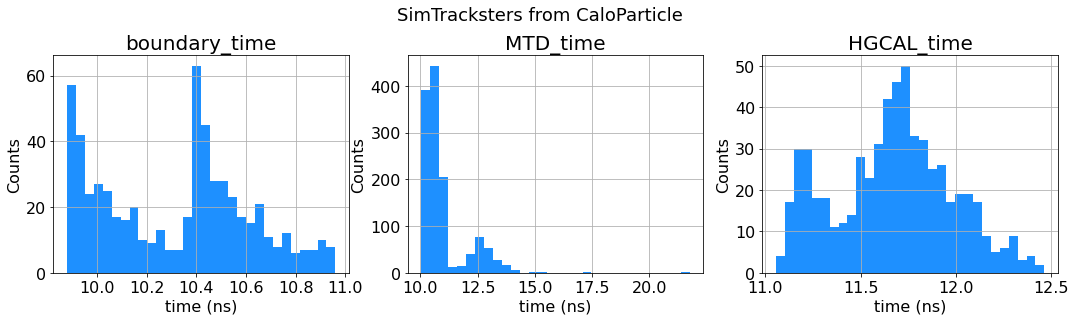

In [13]:
fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(18,4))
fig.suptitle('SimTracksters from CaloParticle', size=18, y=1.05)

subplot(axs[2], CP_CALO_time, title='HGCAL_time')
axs[0].set_title('HGCAL_time')
subplot(axs[1], ETL_time, title='MTD_time')
subplot(axs[0], CP_boundary_time, title='boundary_time')

for ax in axs.flat:
    ax.set_xlabel('time (ns)', fontsize = 16.0)    
    ax.set_ylabel('Counts', fontsize = 16.0)

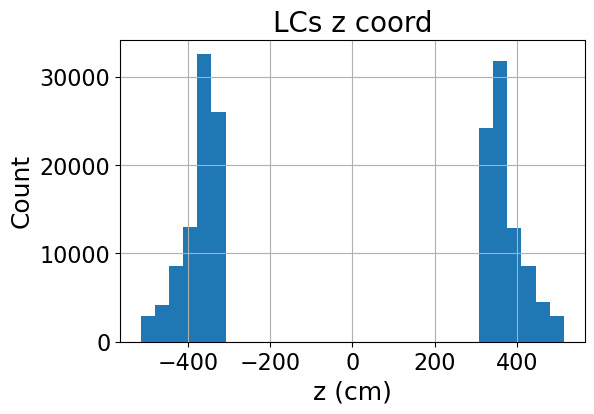

In [41]:
plt.figure(dpi=100)
plt.hist(ak.flatten(ak.flatten(CP_vz)), bins=30)
plt.grid()
#plt.xlim(320,350)
plt.title('LCs z coord')
plt.xlabel('z (cm)', size=18)
plt.ylabel('Count', size=18)
plt.show()

## Visual representation

In [41]:
eid = 0

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')
#ax1.view_init(10, -45)

ax1.set_xlabel("x (cm)")
ax1.set_zlabel("y (cm)")
ax1.set_ylabel("z (cm)")

ax1.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax1.set_zlim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_ylim(ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])
for x, y, z, e in zip(tx1, ty1, tz1, te1):
    ax1.scatter(x, z, y, s=8*e, c='dodgerblue')

for x, y, z, e in zip(tx2, ty2, tz2, te2):
    ax1.scatter(x, z, y, s=8*e, c='red')

ax1.set_title(f"SimTrackster layer-clusters ({len(tx1)} LCs for the blue one and {len(tx2)} LCs for the red one)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [133]:
%matplotlib widget
eid=0

C = 29.9792458 #ns/cm

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(111, projection='3d')

ax1.set_xlabel("x (cm)")
ax1.set_ylabel("y (cm)")
ax1.set_zlabel("z (cm)")

ax1.set_xlim(ak.min(CP_vx[eid]), ak.max(CP_vx[eid]))
ax1.set_ylim(ak.min(CP_vy[eid]), ak.max(CP_vy[eid]))
ax1.set_zlim(ak.min(CP_vz[eid]), ak.max(CP_vz[eid]))

tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])
blue = 0
for x, y, z, e, t in zip(tx1, ty1, tz1, te1, tt1):
    if(t>-99):
        ax1.scatter(x, y, z, s=20*e, c='dodgerblue', alpha=0.5)
        ax1.text(x, y, z, '%.3f ns' % (t) , size=12) #+ (x**2+y**2+z**2)**0.5/C)
        blue += 1

red = 0
for x, y, z, e, t in zip(tx2, ty2, tz2, te2, tt2):
    if(t>-99):
        ax1.scatter(x, y, z, s=20*e, c='r', alpha=0.5)
        ax1.text(x, y, z, '%.3f ns' % (t), size=12) #+ (x**2+y**2+z**2)**0.5/C
        red += 1

ax1.set_title(f"SimTrackster layer-clusters with time\n({blue} LCs for the blue one and {red} LCs for the red one)")
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## animation

In [ ]:
eid = 0

import pandas as pd

df1 = pd.DataFrame({"time": np.array(tt1) + (np.array(tx1)**2+np.array(ty1)**2+np.array(tz1)**2)**0.5/C,
                   "x" :    np.array(tx1), 
                   "y" :    np.array(ty1), 
                   "z" :    np.array(tz1), 
                   "e" :    np.array(te1),
                   "c" :    ['dodgerblue']*len(np.array(tt1))})
df1 =  df1[df1['time']>-80]

df2 = pd.DataFrame({"time": np.array(tt2) + (np.array(tx2)**2+np.array(ty2)**2+np.array(tz2)**2)**0.5/C,
                   "x" :    np.array(tx2), 
                   "y" :    np.array(ty2), 
                   "z" :    np.array(tz2), 
                   "e" :    np.array(te2),
                   "c" :    ['red']*len(np.array(tt2))})
df2 =  df2[df2['time']>-80]

frames = [df1, df2]
df = pd.concat(frames)
#df

deltaT = 0.05 # 30ps
valid_times = df[df['time']>-80]['time']
tmin = min(valid_times)
tmax = max(valid_times)
print('t_min = {:.3f}, t_max = {:.3f}'.format(tmin, tmax))

nframes = len(df['time'])*2
times = np.linspace(tmin, tmax, nframes)

%matplotlib widget
plt.style.use('default')

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter

def update_graph(num):
    #condition = np.where((CP_vt[eid][tr_id]<=times[n]+deltaT) & (CP_vt[eid][tr_id]>=times[n]-deltaT))
    data=df[(df['time']<=times[num]+deltaT) & (df['time']>=times[num]-deltaT)]
    graph._offsets3d = (data.x, data.y, data.z)
    graph.set_sizes(5*np.array(data.e))
    graph.set_edgecolor(np.array(data.c))
    graph.set_facecolor(np.array(data.c))
    title.set_text('Two closeby electrons, time={:.3f} ns'.format(times[num]))

fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')
title = ax.set_title('Two closeby electrons')
xlab = ax.set_xlabel('x(cm)')
ax.set_ylabel('y(cm)')
ax.set_zlabel('z(cm)')

# ax.set_xlim(ak.min(CP_vx[eid])-10, ak.max(CP_vx[eid])+10)
# ax.set_ylim(ak.min(CP_vy[eid])-10, ak.max(CP_vy[eid])+10)
# ax.set_zlim(ak.min(CP_vz[eid])-10, ak.max(CP_vz[eid])+10)

data=df[(df['time']<=times[0]+deltaT) & (df['time']>=times[0]-deltaT)]
graph = ax.scatter(data.x, data.y, data.z, s=5*data.e, c=data.c)
#print(data.x, data.y, data.z)

ani = matplotlib.animation.FuncAnimation(fig, update_graph, nframes, 
                               interval=1000, blit=False)

from matplotlib.animation import PillowWriter
#ani.save("closeByElectronsCorrected2.gif", writer=PillowWriter(fps=2))
plt.show()

## Calculate time along skeleton

In [13]:
%matplotlib widget
eid   = 0
tr_id = 0
# create internal edges per each trackster
all_event_edges, all_event_nodes, covered_node_idxs, all_event_times = [], [], [], []
for tr_id in range(len(CP_bx[eid])):    
    #plt.style.use('default')
    internal_trackster_edges, internal_trackster_nodes, covered_node_idx, times = create_tr_skeletons_single_pca(CP_vx, CP_vy, CP_vz, CP_ve, CP_vt, CP_vi, CP_vm,
                                                                                                          CP_bx, CP_by, CP_bz, CP_be, CP_CALO_time, ev=eid,
                                                                                                          tr_id=tr_id, bubble_size=100, 
                                                                                                          secondary_edges = False)
    #print(internal_trackster_edges)
    all_event_edges.append(internal_trackster_edges)
    all_event_nodes.append(internal_trackster_nodes)
    covered_node_idxs.append(covered_node_idx)
    all_event_times.append(times)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

times of the nearest LCs: 11.504 ns, 12.355 ns
speed of particle along PCA segments: 11.486 cm/ns, 231.587 cm/ns
speed of particle: 31.753 cm/ns
times at the speed of light: 12.073 ns, 12.975 ns


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

times of the nearest LCs: 11.882 ns, 12.865 ns
speed of particle along PCA segments: 94.206 cm/ns, 18.822 cm/ns
speed of particle: 27.570 cm/ns
times at the speed of light: 11.637 ns, 12.541 ns


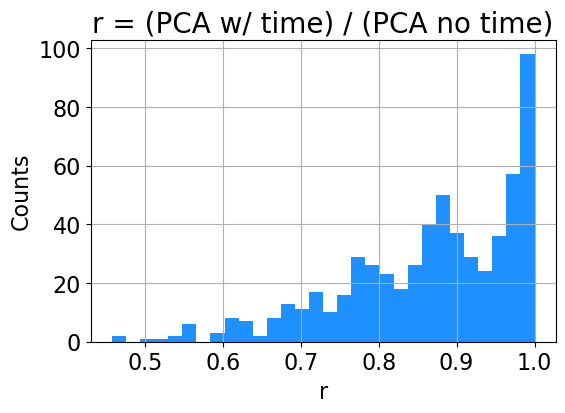

In [117]:
hist(np.array(all_event_lenght)/np.array(all_event_lenght2), xlabel='r', title = 'r = (PCA w/ time) / (PCA no time)')

## check compatibility with G4

In [159]:
deltaT = []
for eid in range(300):
    tx1, ty1, tz1, te1, tt1, tx2, ty2, tz2, te2, tt2 = multiplicity(CP_vx[eid], CP_vy[eid], CP_vz[eid], CP_ve[eid], CP_vt[eid], CP_vi[eid], CP_vm[eid])

    ind = nsmall(tz1,1)
    i=2
    while (tt1[ind] < -80):
        ind = nsmall(tz1, i)
        i+=1
    first_LC = np.array([tx1[ind], ty1[ind], tz1[ind]])
    boundary = np.array([CP_boundx[eid][0], CP_boundy[eid][0], CP_boundz[eid][0]])
    distance = np.linalg.norm(first_LC - boundary)
    bt = CP_boundary_time[eid][0]
    deltaT.append(bt + distance/(np.linalg.norm(boundary)/bt) - tt1[ind])

    ind = np.argmin(tz2)
    i=2
    while (tt2[ind] < -80):
        ind = nsmall(tz2, i)
        i+=1
    first_LC = np.array([tx2[ind], ty2[ind], tz2[ind]])
    boundary = np.array([CP_boundx[eid][1], CP_boundy[eid][1], CP_boundz[eid][1]])
    distance = np.linalg.norm(first_LC - boundary)
    bt = CP_boundary_time[eid][1] -0.5
    deltaT.append(bt + distance/(np.linalg.norm(boundary)/bt) - (tt2[ind]-0.5))

In [160]:
deltaT  = np.array(deltaT)
nphist(deltaT, title='difference between\n1st LC time and G4 time')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## compute residuals wrt truth

In [152]:
def time_dist_res(all_event_nodes, bounds):
    # propagate to boundary
    all_dist  = []
    all_time  = []
    all_speed = []
    
    for i, (nodes, bound) in enumerate(zip(all_event_nodes, bounds)):
        nodi = np.array(sorted(nodes,key=lambda x: x[2]))
        T = (bound[2] - nodi[0][2])/(nodi[-1][2] - nodi[0][2])

        projection = nodi[0][:3] + T*(nodi[-1][:3] - nodi[0][:3])
        res_dist = np.linalg.norm(projection - bound[:3])

        d2bound = np.linalg.norm(bound[:3])
        v2bound = d2bound / (bound[3] - 0.5*i)
        dbound2pca = np.linalg.norm(nodi[0][:3] - projection)#bound[:3]) 
        # from the boundary to the beginning of the PCA, 
        # better from the projection bc we don't have the boundary in the real case, no difference between the two basically
        tbound2pca = dbound2pca / v2bound
        res_time = nodi[0][3] - tbound2pca - bound[3] 
        
        all_dist.append(res_dist)
        all_time.append(res_time)  
        all_speed.append(v2bound)
        
    return all_dist, all_time, all_speed

In [153]:
residual_distance = []
residual_time     = []
residual_speed    = []
for eid in range(300):
    nodes = []
    for tr_id in range(len(CP_bx[eid])):    
        nodes.append(nodes_pca(CP_vx, CP_vy, CP_vz, CP_ve, CP_vt, CP_vi, CP_vm,
                                                           CP_bx, CP_by, CP_bz, CP_be, CP_CALO_time, ev=eid,
                                                           tr_id=tr_id))
    
    b = np.array([CP_boundx[eid], CP_boundy[eid], CP_boundz[eid], CP_boundary_time[eid]]).T
    d, t, s = time_dist_res(nodes, b)
    residual_distance.append(d)
    residual_time.append(t)
    residual_speed.append(s)

In [154]:
nphist(residual_distance, title = 'residual distances', xlabel='cm')
nphist(residual_time, title = 'residual times')
nphist(np.array(residual_speed)/C, title = 'residual speed', xlabel = 'v/c')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## propagate time to boundary

In [14]:
%matplotlib widget
eid = 11

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Reconstruction of two CloseBy electrons")
ax.set(xlabel="x (cm)", ylabel="z (cm)", zlabel="y (cm)")

minX = ak.min((CP_vx[eid], CP_boundx[eid]))
maxX = ak.max((CP_vx[eid], CP_boundx[eid]))
ax.set_xlim(minX, maxX)

# ax.set_xlim(ak.min((CP_vx[eid], CP_boundx[eid])), ak.max((CP_vx[eid], CP_boundx[eid])))
# ax.set_zlim(ak.min((CP_vy[eid], CP_boundy[eid])), ak.max((CP_vy[eid], CP_boundy[eid])))
# ax.set_ylim(ak.min((Z_boundary-10, ak.min(CP_vz[eid]))), ak.max((Z_boundary+10, ak.max(CP_vz[eid]))))

# plot the boundary
xx, yy = np.meshgrid(np.linspace(ak.min((CP_vx[eid], CP_boundx[eid])), ak.max((CP_vx[eid], CP_boundx[eid])), 10), 
                     np.linspace(ak.min((CP_vy[eid], CP_boundy[eid])), ak.max((CP_vy[eid], CP_boundy[eid])), 10))
ax.plot_surface(xx, np.ones((10,10))*CP_boundz[eid][0], yy, color='forestgreen', alpha=0.5)

# sort the nodes wrt to time
all_event_nodes = []
for tr_id in range(len(CP_bx[eid])):    
    all_event_nodes.append(nodes_pca(CP_vx, CP_vy, CP_vz, CP_ve, CP_vt, CP_vi, CP_vm,
                                                       CP_bx, CP_by, CP_bz, CP_be, CP_CALO_time, ev=eid,
                                                       tr_id=tr_id))

# plot the PCA
for nodes in all_event_nodes:
    nodes = np.array(sorted(nodes,key=lambda x: x[2]))
    for i, n in enumerate(nodes):
        ax.scatter(n[0], n[2], n[1], s=10, c='red')
        ax.text(n[0], n[2], n[1], '%.3f ns' % (n[3]), size = 12)
        if i+1 != len(nodes):
            ax.plot([n[0], nodes[i+1][0]], [n[2], nodes[i+1][2]], [n[1], nodes[i+1][1]], c='red')

# propagate time from PCA to boundary
bounds = np.array([CP_boundx[eid], CP_boundy[eid], CP_boundz[eid], CP_boundary_time[eid]]).T
for i, (nodes, bound) in enumerate(zip(all_event_nodes, bounds)):
    nodi = np.array(sorted(nodes, key=lambda x: x[2]))
    T = (bound[2] - nodi[0][2])/(nodi[-1][2] - nodi[0][2])

    projection = nodi[0][:3] + T*(nodi[-1][:3] - nodi[0][:3])
    ax.scatter(projection[0], projection[2], projection[1], s=15, c='blue')
    ax.plot([projection[0], nodi[0][0]], [projection[2], nodi[0][2]], [projection[1], nodi[0][1]], c='dodgerblue', linestyle='dashed')

#     d2bound = np.linalg.norm(bound[:3])
#     v2bound = d2bound / bound[3]
#     dbound2pca = np.linalg.norm(nodi[0][:3] - bound[:3]) # from the boundary to the beginning of the PCA
#     tbound2pca = dbound2pca / v2bound
#     time2proj = nodi[0][3] - tbound2pca
# #     res_time = nodi[0][3] - tbound2pca - bound[3] 
    
    d2pca = np.linalg.norm(nodi[0][:3])
    v2pca = d2pca / (nodi[0][3]- 0.5*i)
    dproj2pca = np.linalg.norm(nodi[0][:3] - projection) # from the projection to the beginning of the PCA
    tproj2pca = dproj2pca / v2pca
    time2proj = nodi[0][3] - tproj2pca 
    ax.text(projection[0], projection[2], projection[1], 'Prop: %.3f ns\n' % (time2proj), size = 10)
    
# truth
for i in range(len(CP_boundx[eid])):
    ax.scatter(CP_boundx[eid][i], CP_boundz[eid][i], CP_boundy[eid][i], marker='X', s=15, c='green')
    ax.text(CP_boundx[eid][i], CP_boundz[eid][i], CP_boundy[eid][i], '\nTruth: %.3f ns' % (CP_boundary_time[eid][i]), size = 10)
    
# draw ETL
a = (ak.min((CP_vx[eid], CP_boundx[eid])), ak.min((CP_vy[eid], CP_boundy[eid])), 299)  # p1
b = (ak.max((CP_vx[eid], CP_boundx[eid])), ak.max((CP_vy[eid], CP_boundy[eid])), 302)  # p2
plot_cube(a, b, ax)

#set_axes_equal(ax)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …